<a href="https://colab.research.google.com/github/Tunguyen09CNTT03/BCGK/blob/main/BCGK_Nh%C3%B3m_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore")

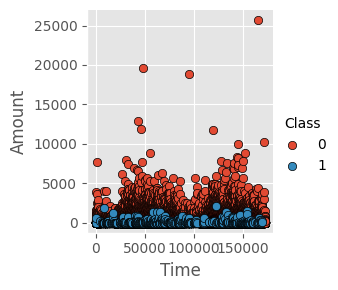

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class").map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

1. Tìm sự tương đồng trong giao dịch:








In [ ]:
from scipy import spatial
sample_data = data.head(284800)
samples = data.loc[284801:284807]

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return False;
}

<IPython.core.display.Javascript object>

In [ ]:
frame = []
for i in range(284801, 284807):
    t1 = samples.loc[i]
    cls = samples.loc[i]["Class"]
    for j in range(284800):
        t2 = sample_data.loc[j]
        class_label = data.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        if (class_label == 1):
            frame.append([class_label, similarity, j])

    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 5 suspected-fraud transactions having highest similarity with transaction ID = "+str(i)+ ":")
    print(df_sorted.iloc[:5])
    print("\n")
    frame = []

Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284801:
     Class  Similarity  Transaction ID
404    1.0         1.0          219025
476    1.0         1.0          263080
447    1.0         1.0          245347
399    1.0         1.0          214775
410    1.0         1.0          222419


Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284802:
     Class  Similarity  Transaction ID
399    1.0         1.0          214775
404    1.0         1.0          219025
476    1.0         1.0          263080
452    1.0         1.0          248971
410    1.0         1.0          222419


Top 5 suspected-fraud transactions having highest similarity with transaction ID = 284803:
     Class  Similarity  Transaction ID
485    1.0         1.0          276071
434    1.0         1.0          238466
396    1.0         1.0          213092
194    1.0         1.0           79874
157    1.0         1.0           57248


Top 5 suspected-fra



2A. Trực quan hóa các hành vi gian lận ở dạng 3D với PCA



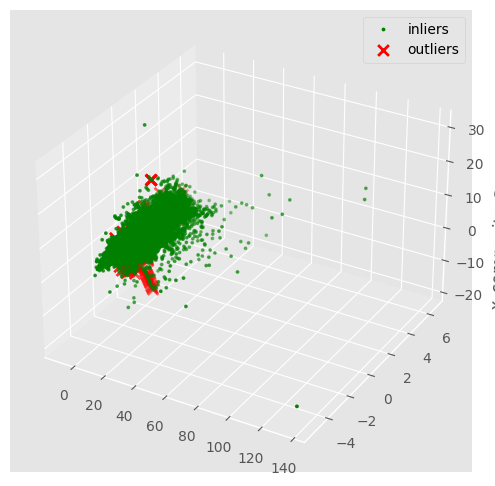

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  #Considered only 3 components to put into 3 dimensions
to_model_cols = data.columns[0:30]
outliers = data.loc[data['Class']==1]
outlier_index=list(outliers.index)
scaler = StandardScaler()
X = scaler.fit_transform(data[to_model_cols])
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_PCA")
# Plotting compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=3, lw=1, label="inliers",c="green")
# Plot x for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           s=60, lw=2, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

2B. Trực quan hóa gian lận trong mô hình 3D bằng t-SNE

In [ ]:
from sklearn.manifold import TSNE
standardized_data = StandardScaler().fit_transform(data)
data_50k = standardized_data[0:50000]
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=250)
data_50k_reduced = tsne.fit_transform(data_50k)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.011s...
[t-SNE] Computed neighbors for 50000 samples in 20.698s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

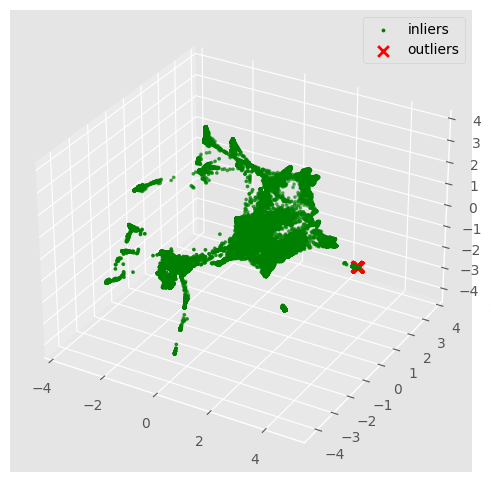

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_tSNE")
# Plotting the compressed data points
ax.scatter(data_50k_reduced[:, 0], data_50k_reduced[:, 1], zs=data_50k_reduced[:, 2], s=3, lw=1, label="inliers",c="green")
# Plot x(s) for the ground truth outliers
out_index = [i for i in outlier_index if i <= 50000]
ax.scatter(data_50k_reduced[out_index,0],data_50k_reduced[out_index,1], data_50k_reduced[out_index,2], lw=2, s=60,
           marker="x", c="red", label="outliers")
ax.legend()
plt.show()

3A. Thuật toán-1A: Rừng cách ly theo nghĩa không được giám sát:

In [ ]:
from sklearn.ensemble import IsolationForest
datacopy = data.copy()
datacopy.columns
to_model_cols = datacopy.columns[0:30]
clf = IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.0009),
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=12345, verbose=0)
clf.fit(datacopy[to_model_cols])
pred = clf.predict(datacopy[to_model_cols])
datacopy['Class'] = pred
outliers = datacopy.loc[datacopy['Class']==-1]
outlier_index=list(outliers.index)
#Find the number of anomalies and normal points (points classified as "-1" are anomalous)
print(datacopy['Class'].value_counts())

 1    284565
-1       242
Name: Class, dtype: int64


3B. Thuật toán-1B: Rừng cô lập theo nghĩa được giám sát:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
n_outliers = len(data[data['Class']==1])
outlier_fraction = len(data[data['Class']==1])/float(len(data[data['Class']==0]))
clf = IsolationForest(n_estimators=100, max_samples=len(data.loc[:,data.columns!='Class']),
                      contamination=outlier_fraction, random_state=12345, verbose=0)
X = data.loc[:,data.columns!='Class']
Y = data['Class']
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

print("{}: {}".format("No. of Anomalous Points with Isolation Forest ",n_errors))
print("Accuracy Score :",accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

No. of Anomalous Points with Isolation Forest : 661
Accuracy Score : 0.9976791300775613
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.33      0.33      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807



Khai báo thư viện

In [ ]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot
import os

Định nghĩa cho các lớp


In [ ]:
class ExNode:
    def __init__(self,size):
        self.size=size

class InNode:
    def __init__(self,left,right,splitAtt,splitVal):
        self.left=left
        self.right=right
        self.splitAtt=splitAtt
        self.splitVal=splitVal

In [ ]:
def iForest(X,noOfTrees,sampleSize):
    forest=[]
    hlim=math.ceil(math.log(sampleSize,2))
    for i in range(noOfTrees):
        X_train=X.sample(sampleSize)
        forest.append(iTree(X_train,0,hlim))
    return forest

In [ ]:
def iTree(X,currHeight,hlim):
    if currHeight>=hlim or len(X)<=1:
        return ExNode(len(X))
    else:
        Q=X.columns
        q=random.choice(Q)
        p=random.choice(X[q].unique())
        X_l=X[X[q]<p]
        X_r=X[X[q]>=p]
        return InNode(iTree(X_l,currHeight+1,hlim),iTree(X_r,currHeight+1,hlim),q,p)

In [ ]:
def pathLength(x,Tree,currHeight):
    if isinstance(Tree,ExNode):
        return currHeight
    a=Tree.splitAtt
    if x[a]<Tree.splitVal:
        return pathLength(x,Tree.left,currHeight+1)
    else:
        return pathLength(x,Tree.right,currHeight+1)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv")
y_true=df['Class']
df_data=df.drop('Class',1)

In [ ]:
sampleSize=10000
ifor=iForest(df_data.sample(100000),10,sampleSize)

In [ ]:
posLenLst=[]
negLenLst=[]

for sim in range(1000):
    ind=random.choice(df_data[y_true==1].index)
    for tree in ifor:
        posLenLst.append(pathLength(df_data.iloc[ind],tree,0))

    ind=random.choice(df_data[y_true==0].index)
    for tree in ifor:
        negLenLst.append(pathLength(df_data.iloc[ind],tree,0))

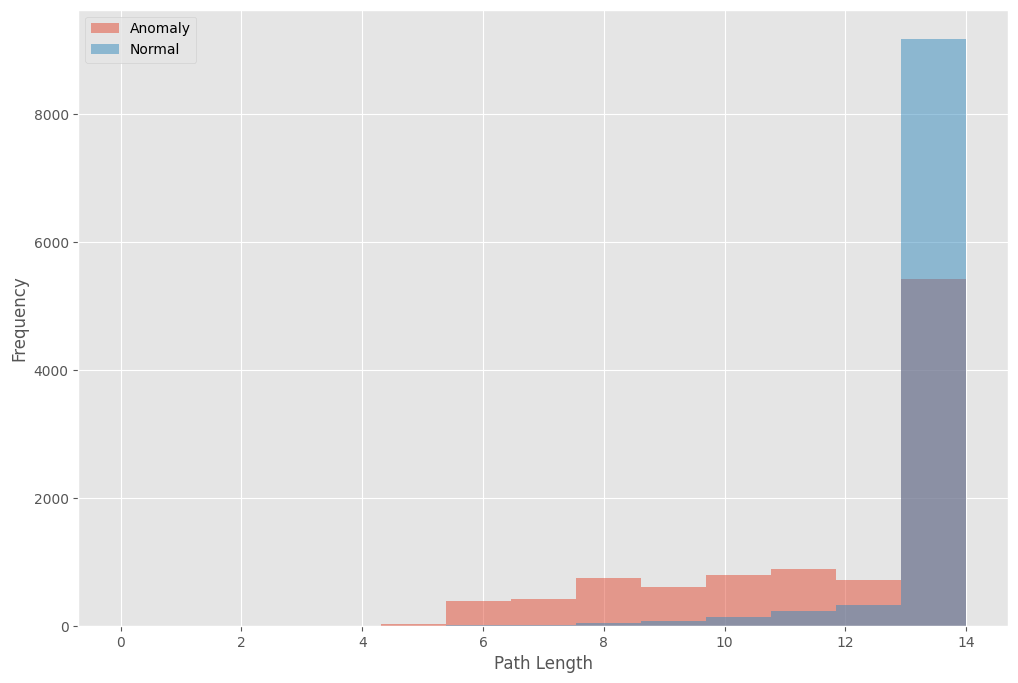

In [ ]:
bins = np.linspace(0,math.ceil(math.log(sampleSize,2)), math.ceil(math.log(sampleSize,2)))

pyplot.figure(figsize=(12,8))
pyplot.hist(posLenLst, bins, alpha=0.5, label='Anomaly')
pyplot.hist(negLenLst, bins, alpha=0.5, label='Normal')
pyplot.xlabel('Path Length')
pyplot.ylabel('Frequency')
pyplot.legend(loc='upper left')

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
df_plt=df[df['Class']==0].sample(1000)
df_plt_pos=df[df['Class']==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',1)

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(X_plt)

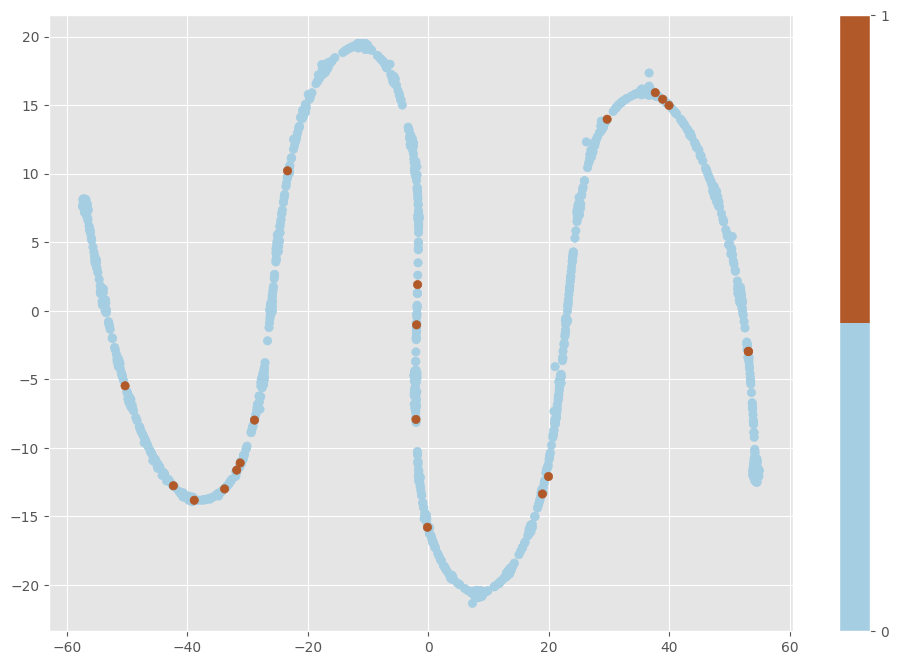

In [ ]:
pyplot.figure(figsize=(12,8))
pyplot.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=pyplot.cm.get_cmap("Paired", 2))
pyplot.colorbar(ticks=range(2))

Để giữ mọi thứ đồng đều, tất cả các thuật toán đều được chạy với các tham số mặc định của chúng.
Nhập triển khai scikit-learn của cả 4 thuật toán.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

Tạo một tập dữ liệu huấn luyện và kiểm tra.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.3, random_state=42)

Tạo một số hàm trợ giúp giúp đào tạo và thử nghiệm các mô hình. Chức năng tiền xử lý không được sử dụng trong sổ tay này nhưng nó có thể giúp cải thiện điểm số trên các mô hình KMeans và One Class SVM.

In [ ]:
def preprocess(df_data):
    for col in df_data:
        df_data[col]=(df_data[col]-np.min(df_data[col]))/(np.max(df_data[col])-np.min(df_data[col]))
    return

Các chức năng đào tạo và dự đoán bên dưới được thiết kế để xuất ra các mô hình tập hợp (mô hình được đóng gói), với kích thước mặc định là 5 mô hình. Rừng cách ly và SVM một lớp sử dụng các chức năng này.

In [ ]:
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

In [ ]:
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

Vì chúng ta đang xử lý một tập dữ liệu mất cân bằng nghiêm trọng nên Điểm F1 được sử dụng làm thước đo cho hiệu suất của mô hình.

Rừng Cách Ly

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

In [ ]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [ ]:
%%timeit
if_mdlLst=train(X_train,alg)

5.21 s ± 1.37 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
if_mdlLst=train(X_train,alg)

In [ ]:
%%timeit
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

29.9 s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [ ]:
roc_auc_score(y_test, if_y_pred_class)

0.9131526428077414

In [ ]:
f1_score(y_test, if_y_pred_class)

0.0539804944431844

In [ ]:
if_cm=confusion_matrix(y_test, if_y_pred_class)

<Axes: >

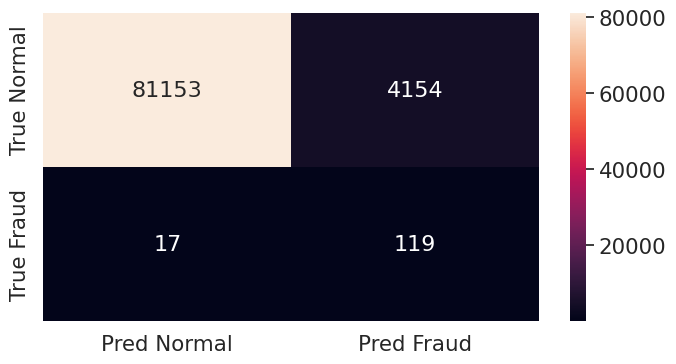

In [ ]:
import seaborn as sn

df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

KMeans

In [ ]:
%%timeit

kmeans = KMeans(n_clusters=8, random_state=42).fit(X_train)

9.05 s ± 913 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X_train)

In [ ]:
%%timeit
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

The slowest run took 5.81 times longer than the fastest. This could mean that an intermediate result is being cached.
1.05 s ± 692 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
X_test_clusters=kmeans.predict(X_test)
X_test_clusters_centers=kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(X_test.values,X_test_clusters_centers[X_test_clusters])]

km_y_pred=np.array(dist)
km_y_pred[dist>=np.percentile(dist,95)]=1
km_y_pred[dist<np.percentile(dist,95)]=0

In [ ]:
roc_auc_score(y_test, km_y_pred)

0.5265078067519458

In [ ]:
f1_score(y_test, km_y_pred)

0.0063506464050805175

In [ ]:
km_cm=confusion_matrix(y_test, km_y_pred)

<Axes: >

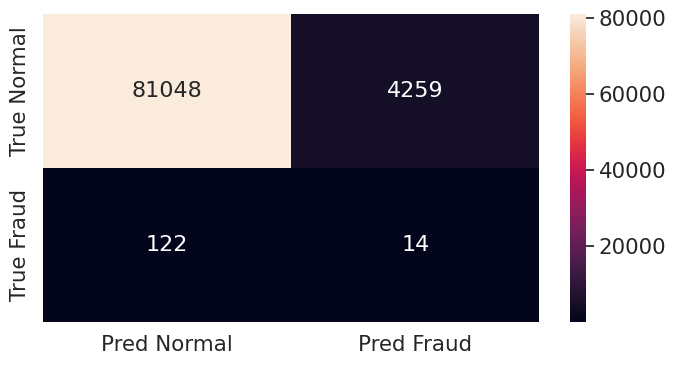

In [ ]:
df_cm = pd.DataFrame(km_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

LOF ( Local Outlier Factor)

In [ ]:
clf=LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, \
                   metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=-1)

In [ ]:
%%timeit
clf.fit(X_test)

47.9 s ± 457 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
clf.fit(X_test)

LocalOutlierFactor(contamination=0.1, n_jobs=-1)

In [ ]:
%%timeit
lof_y_pred=clf.negative_outlier_factor_

#Tạo nhãn lớp dựa trên chức năng quyết định
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

8.15 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
lof_y_pred=clf.negative_outlier_factor_

#Tạo nhãn lớp dựa trên chức năng quyết định
lof_y_pred_class=lof_y_pred.copy()
lof_y_pred_class[lof_y_pred>=np.percentile(lof_y_pred,95)]=1
lof_y_pred_class[lof_y_pred<np.percentile(lof_y_pred,95)]=0

In [ ]:
roc_auc_score(y_test, lof_y_pred_class)

0.4970491525762661

In [ ]:
f1_score(y_test, lof_y_pred_class)

0.0027217056021773644

In [ ]:
lof_cm=confusion_matrix(y_test, lof_y_pred_class)

<Axes: >

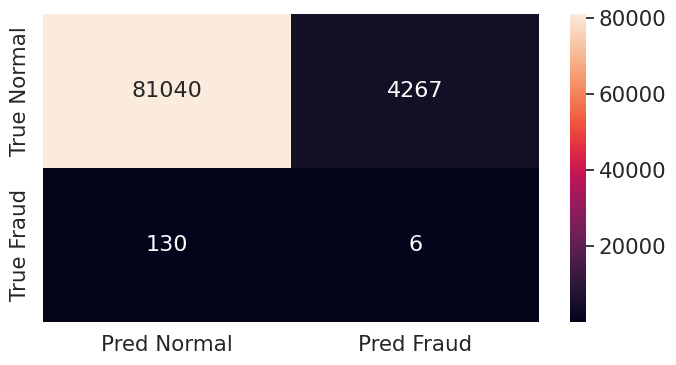

In [ ]:
df_cm = pd.DataFrame(lof_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

One-Class SVM

In [ ]:
alg=OneClassSVM(kernel='linear',gamma='auto', coef0=0.0, tol=0.001, nu=0.5, \
                shrinking=True, cache_size=500, verbose=False, max_iter=-1)

In [ ]:
%%timeit
osvm_mdlLst=train(X_train,alg)

26.8 s ± 543 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
osvm_mdlLst=train(X_train,alg)

In [ ]:
%%timeit
osvm_y_pred=predict(X_test,osvm_mdlLst)

#Tạo nhãn lớp dựa trên chức năng quyết định
osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

1min 34s ± 1.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
osvm_y_pred=predict(X_test,osvm_mdlLst)


osvm_y_pred_class=osvm_y_pred.copy()
osvm_y_pred_class[osvm_y_pred<0]=1
osvm_y_pred_class[osvm_y_pred>=0]=0

In [ ]:
roc_auc_score(y_test, osvm_y_pred_class)

0.5142442710376847

In [ ]:
f1_score(y_test, osvm_y_pred_class)

0.003356021932312347

In [ ]:
osvm_cm=confusion_matrix(y_test, osvm_y_pred_class)

<Axes: >

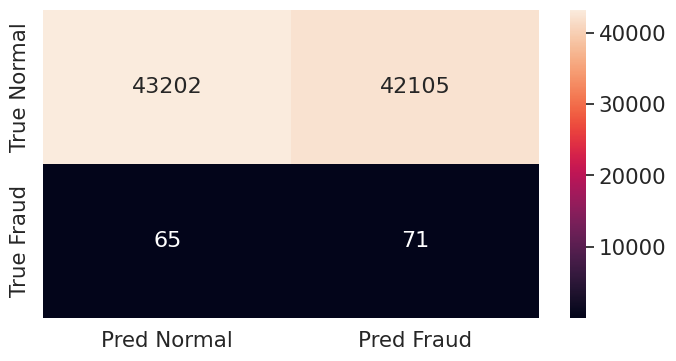

In [ ]:
df_cm = pd.DataFrame(osvm_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
pyplot.figure(figsize = (8,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')

Phần kết luận

In [ ]:
train_times={
    'Isolation Forest': 4.38,
    'KMeans':20.9,
    'LOF':2.06,
    'OneClass SVM': 21.4
}

prediction_times={
    'Isolation Forest':34.2,
    'KMeans':0.052,
    'LOF':0.00368,
    'OneClass SVM': 71
}

Text(0.5, 0, 'Time in seconds')

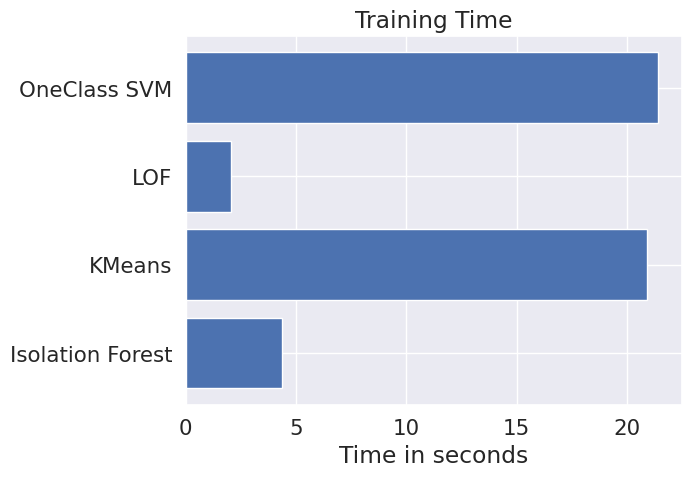

In [ ]:
pyplot.title('Training Time')
pyplot.barh(range(len(train_times)), list(train_times.values()), align='center')
pyplot.yticks(range(len(train_times)), list(train_times.keys()))
pyplot.xlabel('Time in seconds')

Text(0.5, 0, 'Time in seconds')

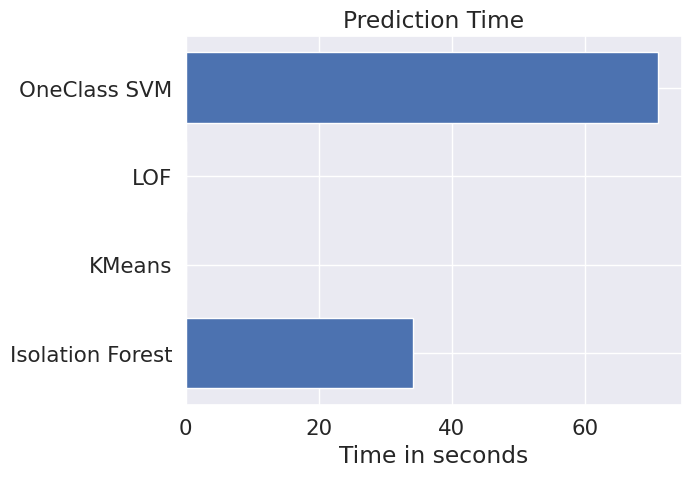

In [ ]:
pyplot.title('Prediction Time')
pyplot.barh(range(len(prediction_times)), list(prediction_times.values()), align='center')
pyplot.yticks(range(len(prediction_times)), list(prediction_times.keys()))
pyplot.xlabel('Time in seconds')

In [ ]:
auc_scores={
    'Isolation Forest': roc_auc_score(y_test, if_y_pred_class),
    'KMeans':roc_auc_score(y_test, km_y_pred),
    'LOF':roc_auc_score(y_test, lof_y_pred_class),
    'OneClass SVM': roc_auc_score(y_test, osvm_y_pred_class)
}

f1_scores={
    'Isolation Forest':f1_score(y_test, if_y_pred_class),
    'KMeans':f1_score(y_test, km_y_pred),
    'LOF':f1_score(y_test, lof_y_pred_class),
    'OneClass SVM': f1_score(y_test, osvm_y_pred_class)
}

Text(0.5, 0, 'AUC Score')

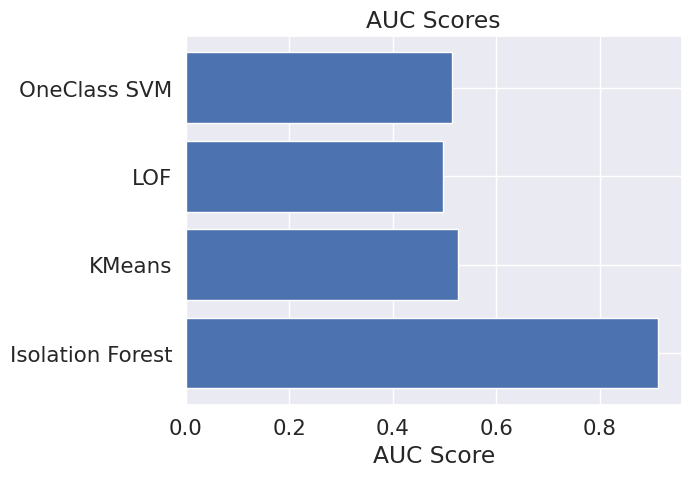

In [ ]:
pyplot.title('AUC Scores')
pyplot.barh(range(len(auc_scores)), list(auc_scores.values()), align='center')
pyplot.yticks(range(len(auc_scores)), list(auc_scores.keys()))
pyplot.xlabel('AUC Score')

Text(0.5, 0, 'F1 Score')

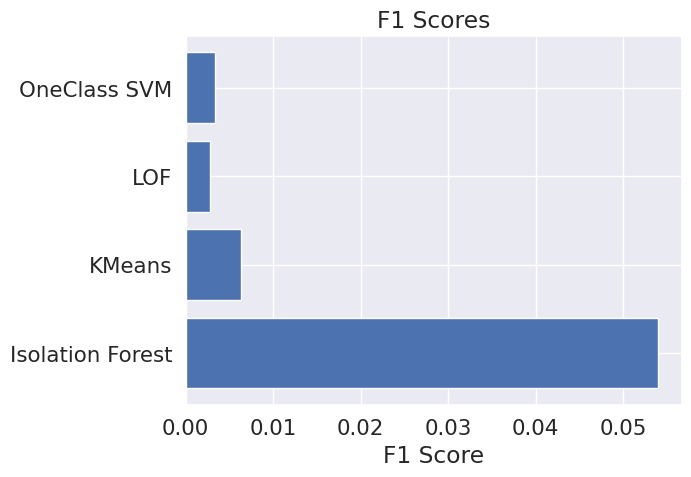

In [ ]:
pyplot.title('F1 Scores')
pyplot.barh(range(len(f1_scores)), list(f1_scores.values()), align='center')
pyplot.yticks(range(len(f1_scores)), list(f1_scores.keys()))
pyplot.xlabel('F1 Score')